ENHANCED WAVEGUIDE ANALYSIS WITH OPTIMAL THICKNESS FINDING
Analysis Parameters:
Frequency Range: 1.0-10.0 GHz
Wavelength Range: 299.8-30.0 mm
Poly-Si Thickness Range: 100-3000 nm

1. FREQUENCY AND WAVELENGTH ANALYSIS


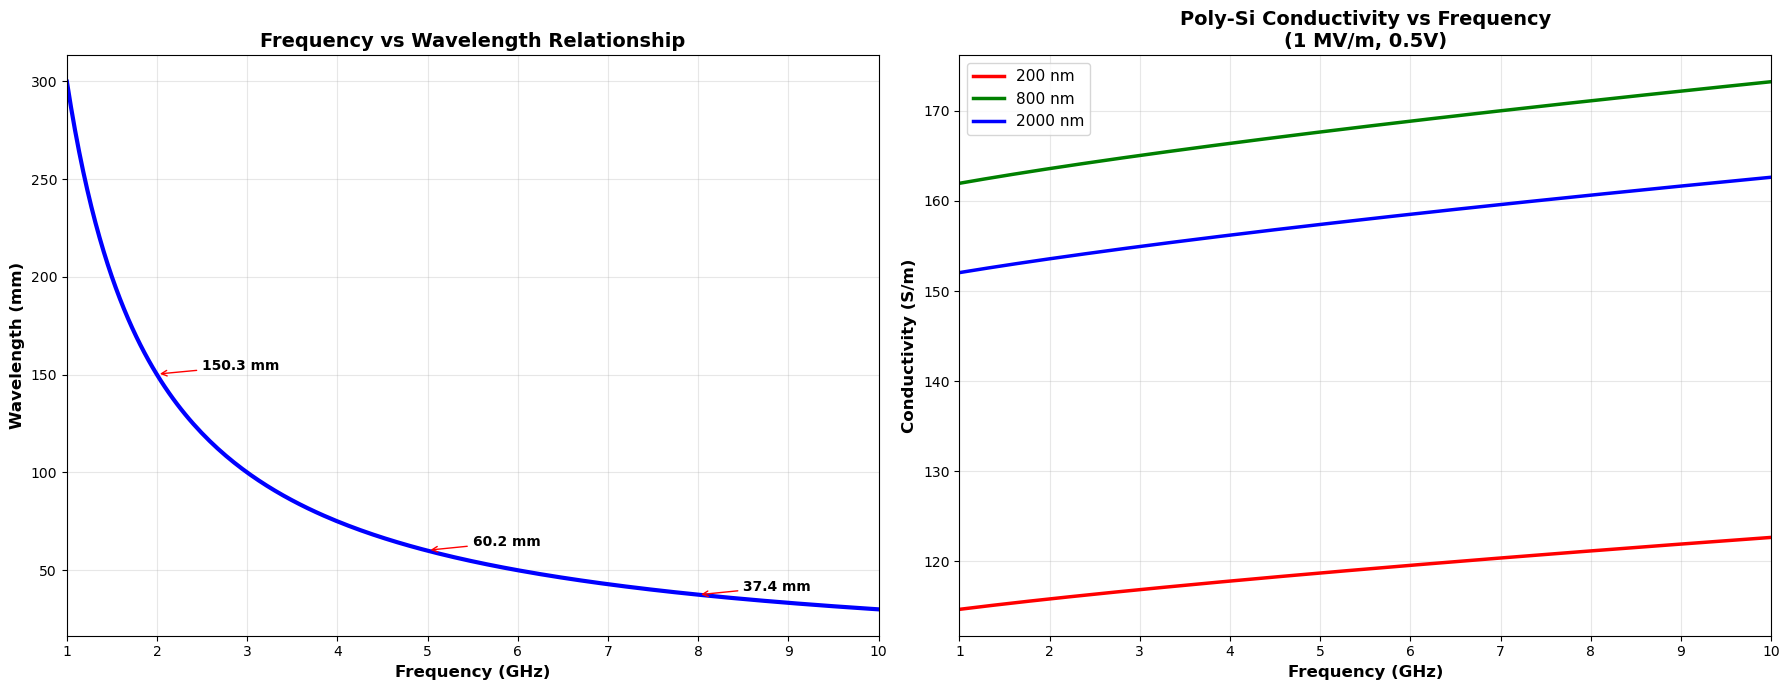


2. OPTIMAL THICKNESS ANALYSIS


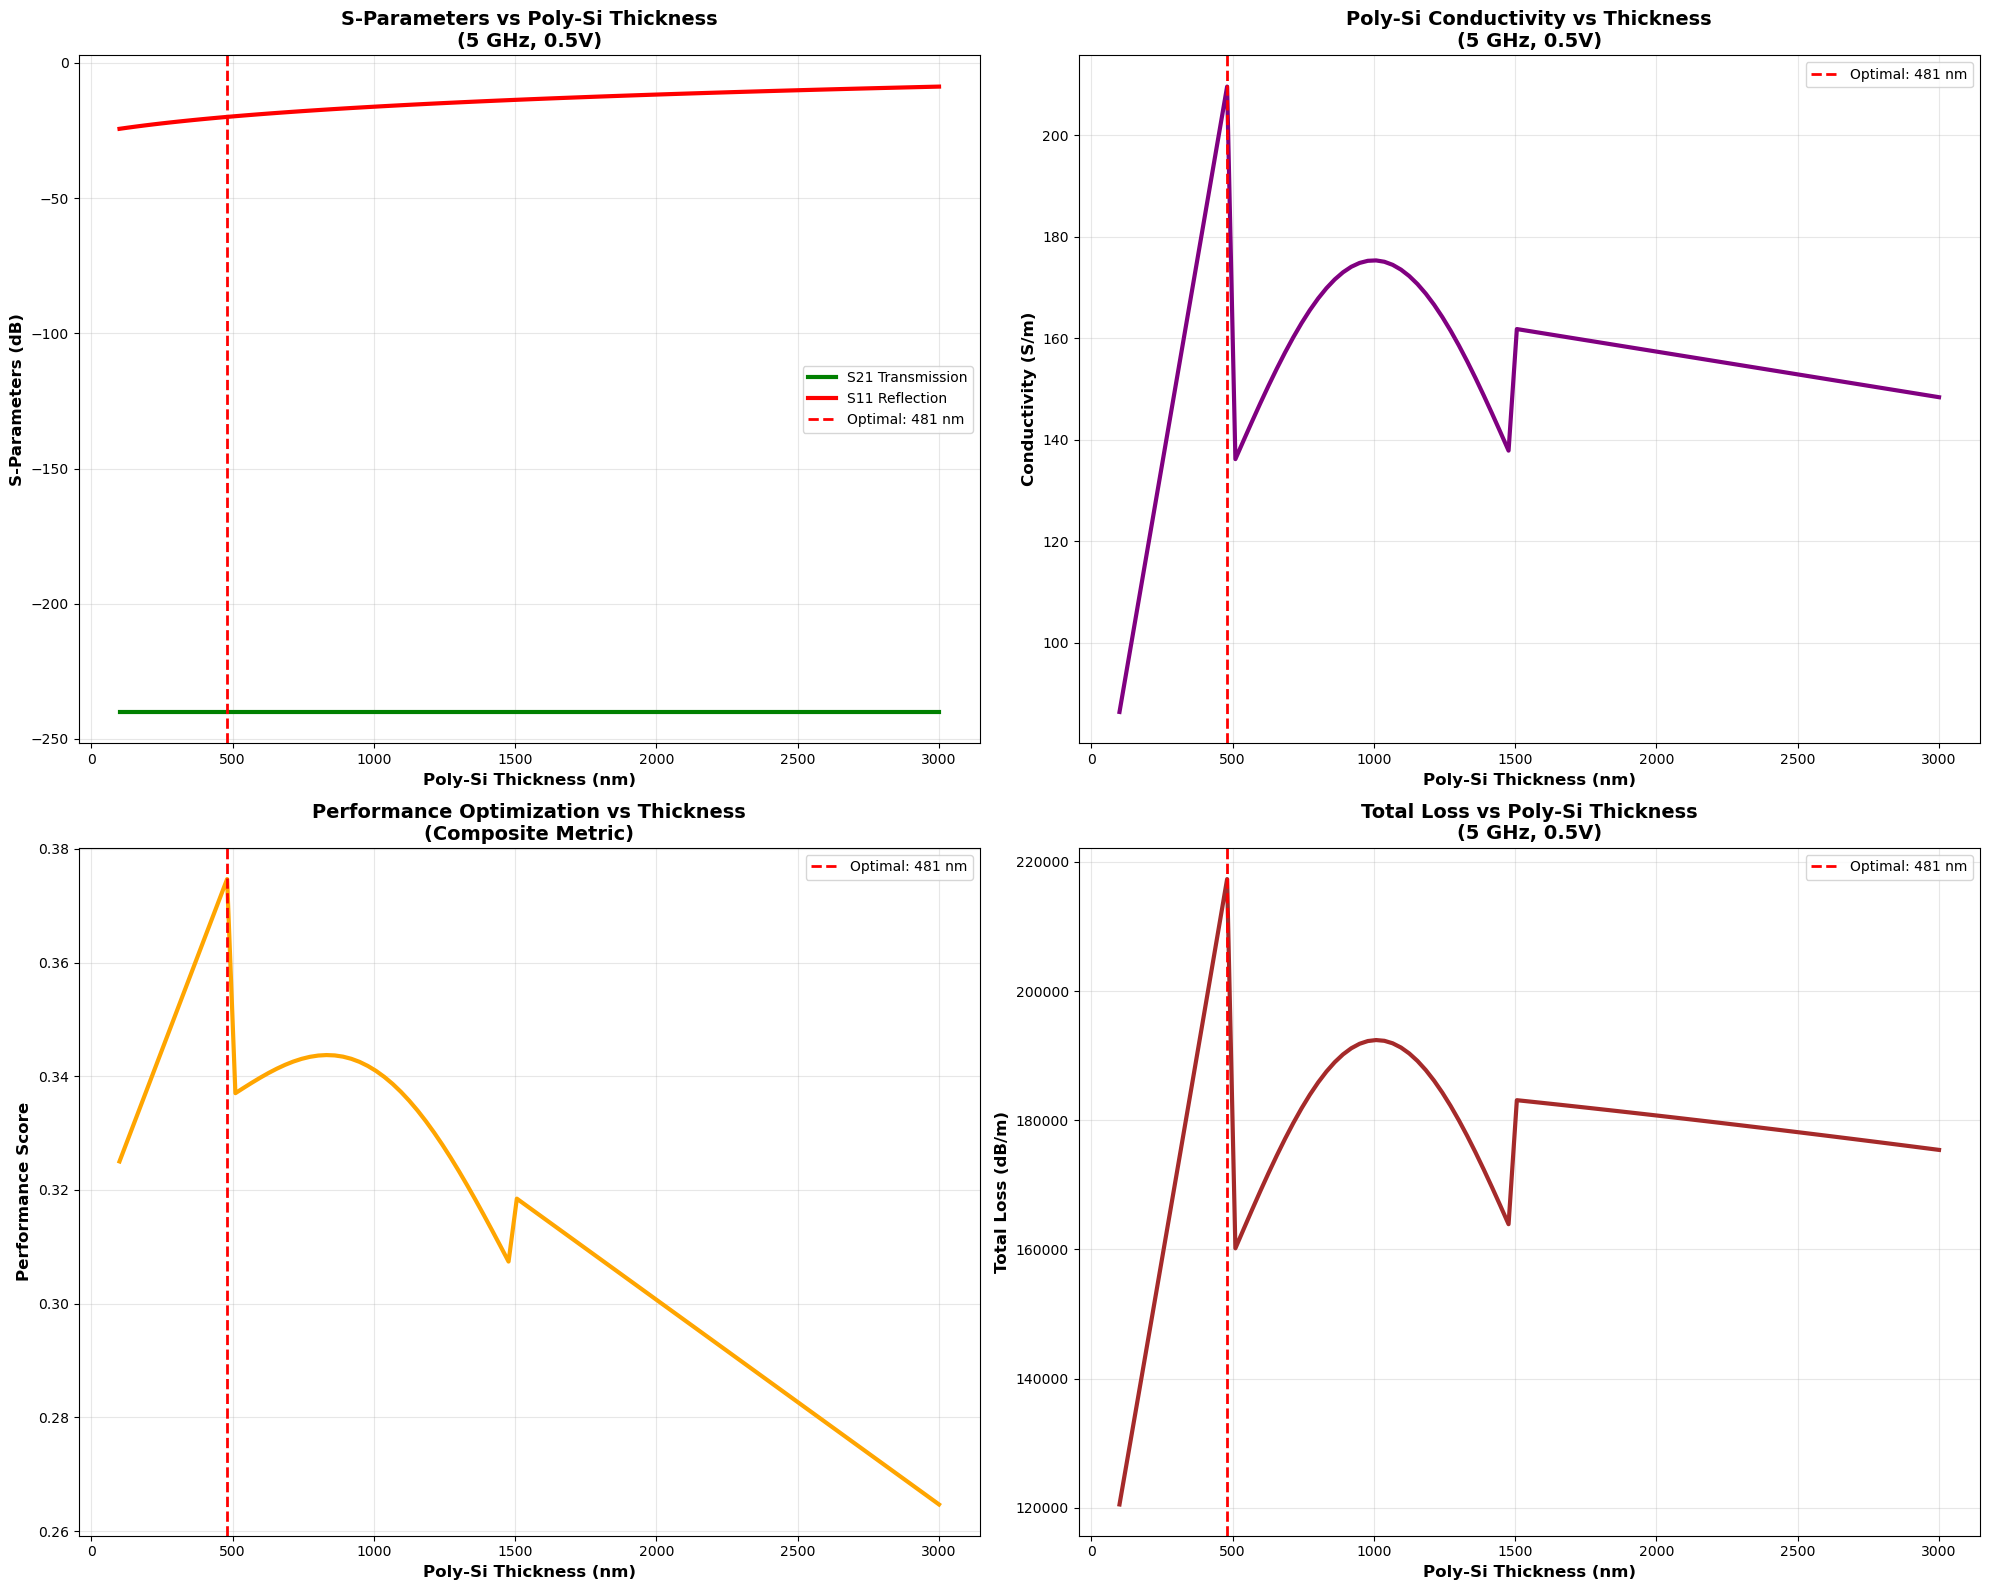


3. EXTREME VALUE ANALYSIS


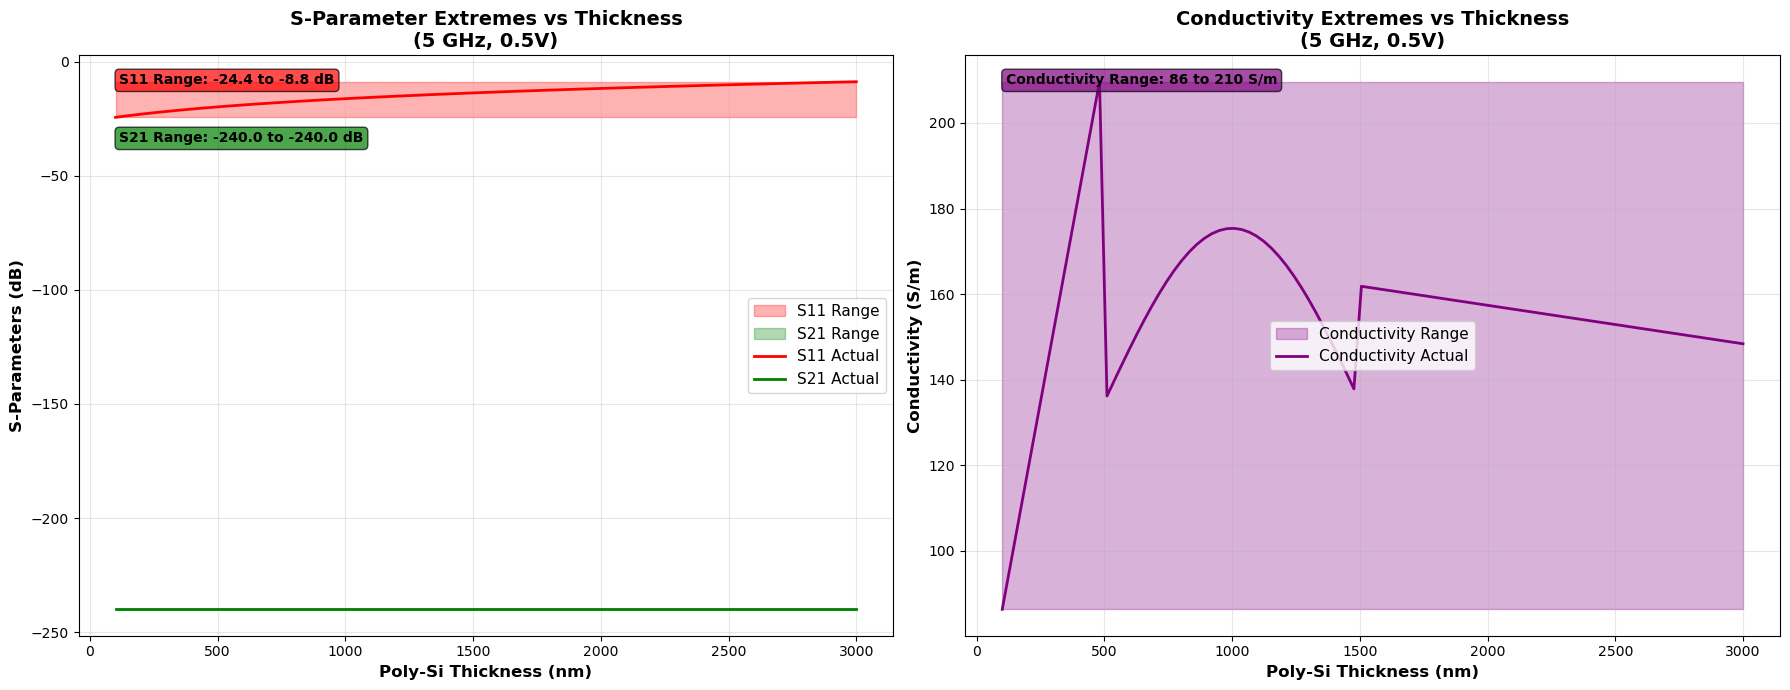


4. 3D PARAMETER SWEEP ANALYSIS


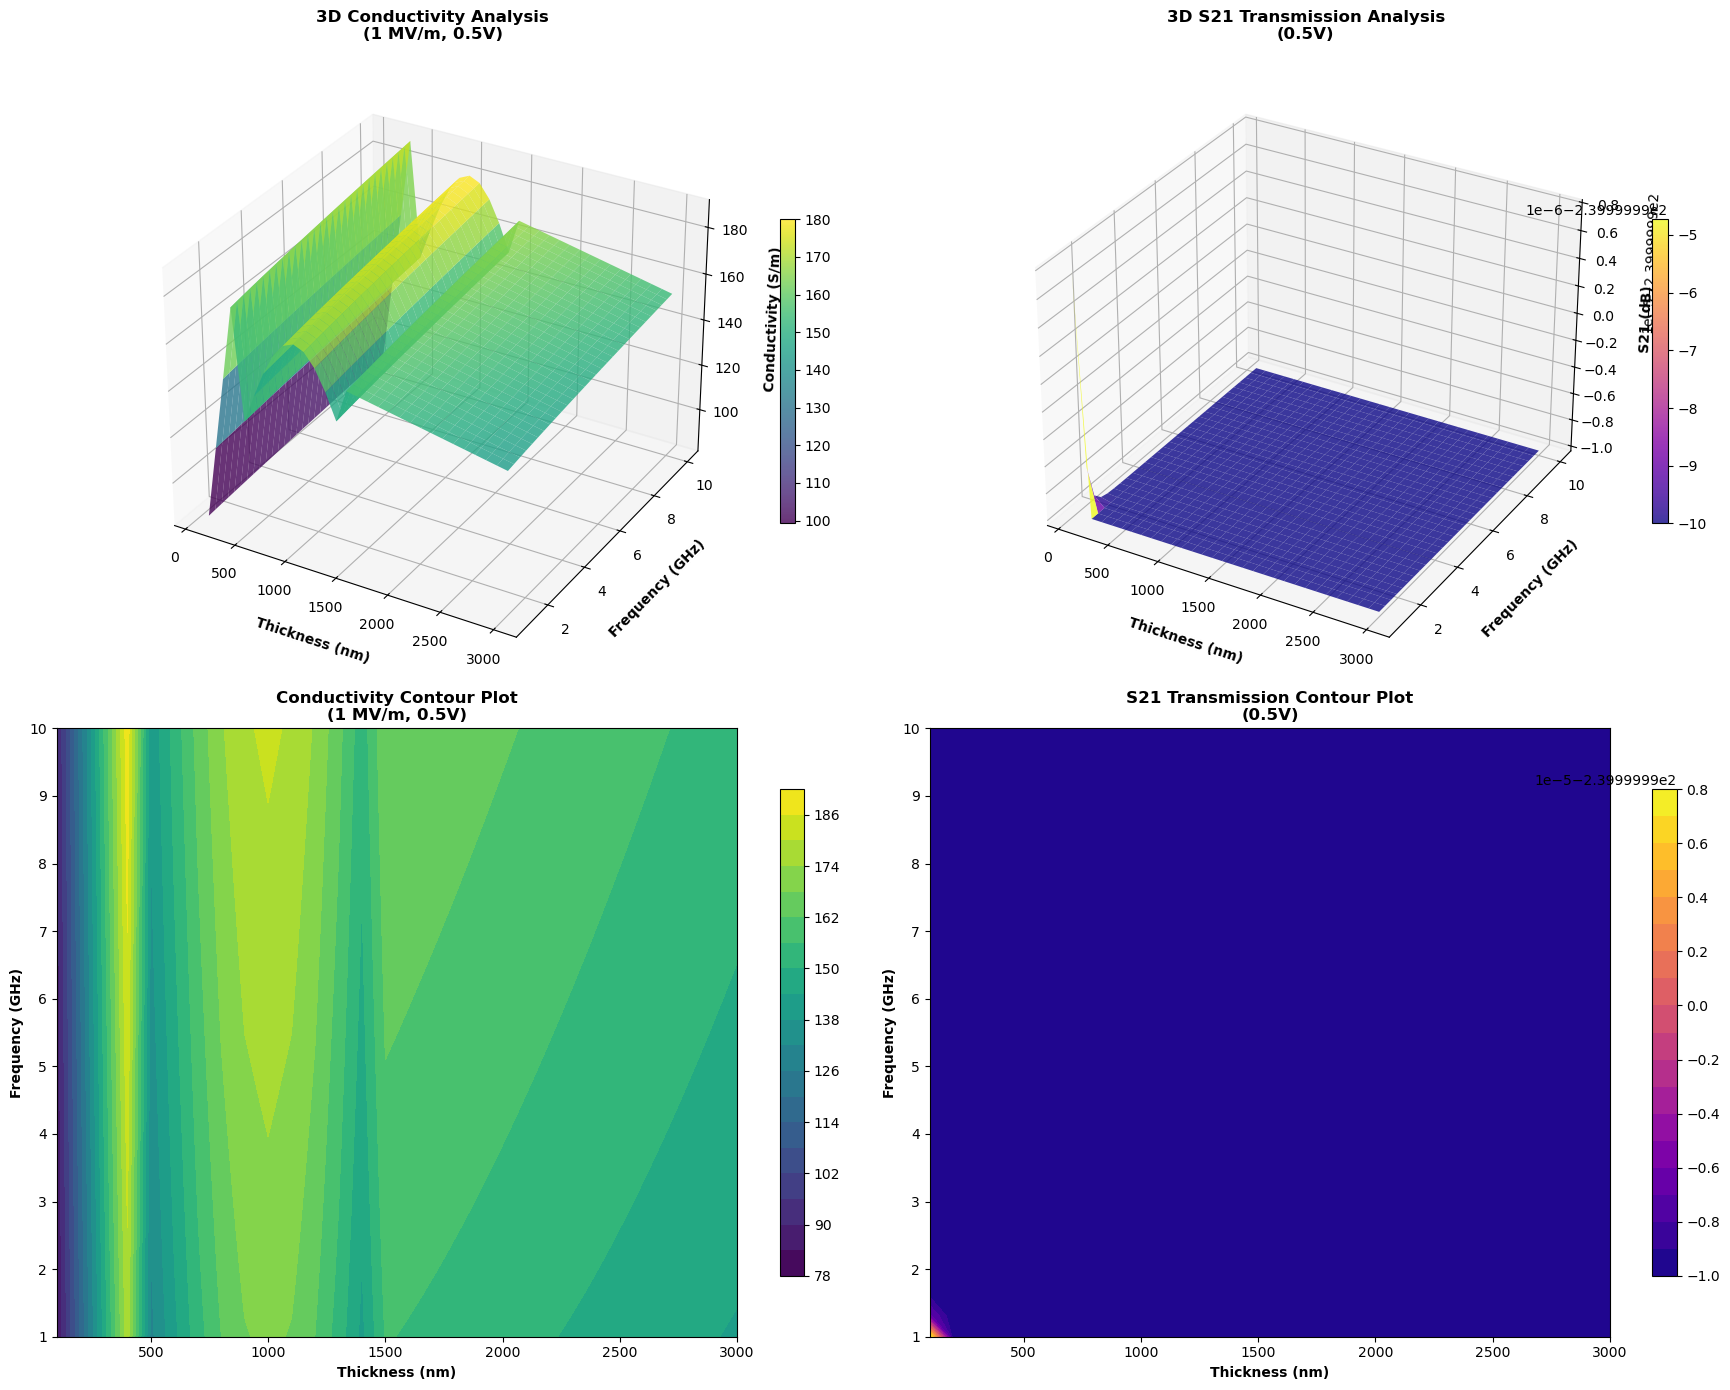


5. COMPREHENSIVE RESULTS SUMMARY

COMPREHENSIVE OPTIMAL RESULTS SUMMARY
Optimal Poly-Si Thickness: 481 nm

Performance at Optimal Thickness:
  S21 Transmission: -240.00 dB
  S11 Reflection: -19.96 dB
  Poly-Si Conductivity: 209.6 S/m
  Total Loss: 217337.21 dB/m

Parameter Extremes Across Thickness Range (0.1-3.0 μm):
  S11 Range: -24.4 to -8.8 dB
  S21 Range: -240.0 to -240.0 dB
  Conductivity Range: 86 to 210 S/m

Performance Improvement at Optimal Point:
  S21 Improvement: 0.0 dB vs minimum
  Conductivity Improvement: 123 S/m vs minimum


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, epsilon_0, mu_0
import matplotlib.patches as patches

class EnhancedWaveguideAnalysis:
    def __init__(self):
        # Physical constants
        self.c = c
        self.epsilon_0 = epsilon_0
        self.mu_0 = mu_0
        
        # Copper properties
        self.sigma_cu = 5.96e7
        self.rho_cu = 1.68e-8
        
        # Material properties
        self.n_si = 3.45
        self.n_polysi = 3.50
        self.n_sio2 = 1.45
        
        # Copper Waveguide dimensions
        self.W1 = 130e-6
        self.W2_range = np.linspace(15e-6, 120e-6, 10)
        self.W3 = 130e-6
        self.H = 3e-6
        self.L = 4e-3
        self.gap = 10e-6
        
        # CORRECTED Layer thicknesses
        self.t_sio2 = 2e-6      # SiO2 BOX - TOP LAYER
        self.t_polysi_range = np.linspace(0.1e-6, 3e-6, 100)  # Higher resolution
        self.t_si = 5e-6        # Si Substrate - BOTTOM LAYER (changed from 200e-6 to 5e-6)
        
        # Enhanced simulation parameters
        self.freq_range = np.linspace(1e9, 10e9, 200)  # Higher resolution
        self.voltage_range = np.linspace(-1, 1, 50)
        self.wavelength_range = self.c / self.freq_range

    def polysi_conductivity_model(self, E_field, t_polysi, voltage, freq):
        """Enhanced conductivity model for Poly-Si"""
        sigma_0 = 100
        
        # Field enhancement
        E_eff = np.abs(E_field) + 1e3
        field_factor = 1 + 0.2 * (E_eff/1e6)**1.5
        
        # Thickness effects with smooth transitions
        if t_polysi < 0.5e-6:
            thickness_factor = 0.4 + 1.2 * (t_polysi/0.5e-6)
        elif t_polysi < 1.5e-6:
            thickness_factor = 1.0 + 0.3 * np.sin(np.pi * (t_polysi - 0.5e-6)/1e-6)
        else:
            thickness_factor = 1.2 - 0.1 * ((t_polysi - 1.5e-6)/1.5e-6)
        
        # Voltage modulation
        voltage_factor = 1 + 0.15 * abs(voltage)
        
        # Frequency dispersion
        freq_factor = 1 + 0.02 * (freq/1e9)**0.7 - 0.01 * (freq/1e9)**0.3
        
        return sigma_0 * field_factor * thickness_factor * voltage_factor * freq_factor

    def s_parameters_model(self, freq, t_polysi, voltage):
        """Enhanced S-parameters model"""
        # Effective refractive index
        n_eff = (self.n_sio2 * self.t_sio2 + 
                self.n_polysi * t_polysi + 
                self.n_si * self.t_si) / (self.t_sio2 + t_polysi + self.t_si)
        
        wavelength = self.c / freq
        beta = 2 * np.pi * n_eff / wavelength
        
        # Conductivity and losses
        conductivity = self.polysi_conductivity_model(1e6, t_polysi, voltage, freq)
        tan_delta = conductivity / (2 * np.pi * freq * self.epsilon_0 * self.n_polysi**2)
        alpha_diel = 8.686 * (2 * np.pi * freq / self.c) * n_eff * tan_delta
        
        # Conductor losses
        skin_depth = np.sqrt(2 / (2 * np.pi * freq * self.mu_0 * self.sigma_cu))
        alpha_cond = 8.686 * (1/self.W1 + 1/self.H) / (self.sigma_cu * skin_depth)
        
        # Scattering losses
        if t_polysi < 0.3e-6:
            alpha_scatter = 0.5 * (0.3e-6/t_polysi)
        else:
            alpha_scatter = 0.1 + 0.05 * (t_polysi/1e-6)
        
        total_loss = alpha_diel + alpha_cond + alpha_scatter
        alpha_total = total_loss / 8.686
        
        # S-parameters
        S21 = np.exp(-alpha_total * self.L)
        S11 = 0.05 + 0.1 * (t_polysi/1e-6) * (1 + 0.1 * abs(voltage))
        
        return np.abs(S11), np.abs(S21), conductivity, total_loss

    def plot_frequency_wavelength_analysis(self):
        """Plot 1: Frequency and wavelength analysis with conductivity"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        # Plot 1: Frequency vs Wavelength
        wavelengths_mm = self.wavelength_range * 1000
        
        ax1.plot(self.freq_range/1e9, wavelengths_mm, 'b-', linewidth=3)
        ax1.set_xlabel('Frequency (GHz)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Wavelength (mm)', fontsize=12, fontweight='bold')
        ax1.set_title('Frequency vs Wavelength Relationship', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        ax1.set_xlim(1, 10)
        
        # Add wavelength annotations
        for freq in [2, 5, 8]:
            idx = np.abs(self.freq_range/1e9 - freq).argmin()
            wavelength = wavelengths_mm[idx]
            ax1.annotate(f'{wavelength:.1f} mm', 
                        xy=(freq, wavelength),
                        xytext=(freq+0.5, wavelength+2),
                        arrowprops=dict(arrowstyle='->', color='red', lw=1),
                        fontsize=10, fontweight='bold')
        
        # Plot 2: Conductivity vs Frequency for different thicknesses
        thickness_cases = [0.2e-6, 0.8e-6, 2.0e-6]
        colors = ['red', 'green', 'blue']
        labels = ['200 nm', '800 nm', '2000 nm']
        fixed_voltage = 0.5
        
        for i, t_polysi in enumerate(thickness_cases):
            conductivity_freq = []
            for freq in self.freq_range:
                conductivity = self.polysi_conductivity_model(1e6, t_polysi, fixed_voltage, freq)
                conductivity_freq.append(conductivity)
            
            ax2.plot(self.freq_range/1e9, conductivity_freq, color=colors[i], 
                    linewidth=2.5, label=labels[i])
        
        ax2.set_xlabel('Frequency (GHz)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Conductivity (S/m)', fontsize=12, fontweight='bold')
        ax2.set_title('Poly-Si Conductivity vs Frequency\n(1 MV/m, 0.5V)', 
                     fontsize=14, fontweight='bold')
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
        ax2.set_xlim(1, 10)
        
        plt.tight_layout()
        plt.show()

    def plot_optimal_thickness_analysis(self):
        """Plot 2: Comprehensive optimal thickness analysis"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
        
        thickness_nm = self.t_polysi_range * 1e9
        fixed_freq = 5e9
        fixed_voltage = 0.5
        
        # Calculate all parameters
        S11_values = []
        S21_values = []
        conductivity_values = []
        loss_values = []
        performance_scores = []
        
        for t_polysi in self.t_polysi_range:
            S11, S21, conductivity, loss = self.s_parameters_model(fixed_freq, t_polysi, fixed_voltage)
            S11_values.append(S11)
            S21_values.append(S21)
            conductivity_values.append(conductivity)
            loss_values.append(loss)
            
            # Performance score
            performance = (0.4 * S21 + 0.3 * (1 - S11) + 
                         0.2 * (conductivity/400) + 0.1 * (1 - min(loss/10, 1)))
            performance_scores.append(performance)
        
        # Convert to dB for S-parameters
        S11_db = [20 * np.log10(S11 + 1e-12) for S11 in S11_values]
        S21_db = [20 * np.log10(S21 + 1e-12) for S21 in S21_values]
        
        # Plot 1: S-parameters vs Thickness
        ax1.plot(thickness_nm, S21_db, 'g-', linewidth=3, label='S21 Transmission')
        ax1.plot(thickness_nm, S11_db, 'r-', linewidth=3, label='S11 Reflection')
        ax1.set_xlabel('Poly-Si Thickness (nm)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('S-Parameters (dB)', fontsize=12, fontweight='bold')
        ax1.set_title('S-Parameters vs Poly-Si Thickness\n(5 GHz, 0.5V)', 
                     fontsize=14, fontweight='bold')
        ax1.legend(fontsize=11)
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Conductivity vs Thickness
        ax2.plot(thickness_nm, conductivity_values, 'purple', linewidth=3)
        ax2.set_xlabel('Poly-Si Thickness (nm)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Conductivity (S/m)', fontsize=12, fontweight='bold')
        ax2.set_title('Poly-Si Conductivity vs Thickness\n(5 GHz, 0.5V)', 
                     fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        # Plot 3: Performance Score vs Thickness
        ax3.plot(thickness_nm, performance_scores, 'orange', linewidth=3)
        ax3.set_xlabel('Poly-Si Thickness (nm)', fontsize=12, fontweight='bold')
        ax3.set_ylabel('Performance Score', fontsize=12, fontweight='bold')
        ax3.set_title('Performance Optimization vs Thickness\n(Composite Metric)', 
                     fontsize=14, fontweight='bold')
        ax3.grid(True, alpha=0.3)
        
        # Plot 4: Loss Analysis vs Thickness
        ax4.plot(thickness_nm, loss_values, 'brown', linewidth=3)
        ax4.set_xlabel('Poly-Si Thickness (nm)', fontsize=12, fontweight='bold')
        ax4.set_ylabel('Total Loss (dB/m)', fontsize=12, fontweight='bold')
        ax4.set_title('Total Loss vs Poly-Si Thickness\n(5 GHz, 0.5V)', 
                     fontsize=14, fontweight='bold')
        ax4.grid(True, alpha=0.3)
        
        # Find and mark optimal points
        optimal_idx = np.argmax(performance_scores)
        optimal_thickness = thickness_nm[optimal_idx]
        
        for ax in [ax1, ax2, ax3, ax4]:
            ax.axvline(optimal_thickness, color='red', linestyle='--', linewidth=2,
                      label=f'Optimal: {optimal_thickness:.0f} nm')
            ax.legend(fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
        return optimal_thickness, S11_db, S21_db, conductivity_values, performance_scores

    def plot_extreme_value_analysis(self):
        """Plot 3: Extreme value analysis of S-parameters and conductivity"""
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
        
        thickness_nm = self.t_polysi_range * 1e9
        fixed_freq = 5e9
        fixed_voltage = 0.5
        
        # Calculate parameters
        S11_values = []
        S21_values = []
        conductivity_values = []
        
        for t_polysi in self.t_polysi_range:
            S11, S21, conductivity, _ = self.s_parameters_model(fixed_freq, t_polysi, fixed_voltage)
            S11_values.append(S11)
            S21_values.append(S21)
            conductivity_values.append(conductivity)
        
        S11_db = [20 * np.log10(S11 + 1e-12) for S11 in S11_values]
        S21_db = [20 * np.log10(S21 + 1e-12) for S21 in S21_values]
        
        # Plot 1: S-parameter extremes
        ax1.fill_between(thickness_nm, min(S11_db), max(S11_db), alpha=0.3, color='red', label='S11 Range')
        ax1.fill_between(thickness_nm, min(S21_db), max(S21_db), alpha=0.3, color='green', label='S21 Range')
        ax1.plot(thickness_nm, S11_db, 'r-', linewidth=2, label='S11 Actual')
        ax1.plot(thickness_nm, S21_db, 'g-', linewidth=2, label='S21 Actual')
        
        ax1.set_xlabel('Poly-Si Thickness (nm)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('S-Parameters (dB)', fontsize=12, fontweight='bold')
        ax1.set_title('S-Parameter Extremes vs Thickness\n(5 GHz, 0.5V)', 
                     fontsize=14, fontweight='bold')
        ax1.legend(fontsize=11)
        ax1.grid(True, alpha=0.3)
        
        # Add min/max annotations
        s11_min, s11_max = min(S11_db), max(S11_db)
        s21_min, s21_max = min(S21_db), max(S21_db)
        
        ax1.text(0.05, 0.95, f'S11 Range: {s11_min:.1f} to {s11_max:.1f} dB', 
                transform=ax1.transAxes, fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="red", alpha=0.7))
        ax1.text(0.05, 0.85, f'S21 Range: {s21_min:.1f} to {s21_max:.1f} dB', 
                transform=ax1.transAxes, fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="green", alpha=0.7))
        
        # Plot 2: Conductivity extremes
        cond_min, cond_max = min(conductivity_values), max(conductivity_values)
        
        ax2.fill_between(thickness_nm, cond_min, cond_max, alpha=0.3, color='purple', label='Conductivity Range')
        ax2.plot(thickness_nm, conductivity_values, 'purple', linewidth=2, label='Conductivity Actual')
        
        ax2.set_xlabel('Poly-Si Thickness (nm)', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Conductivity (S/m)', fontsize=12, fontweight='bold')
        ax2.set_title('Conductivity Extremes vs Thickness\n(5 GHz, 0.5V)', 
                     fontsize=14, fontweight='bold')
        ax2.legend(fontsize=11)
        ax2.grid(True, alpha=0.3)
        
        ax2.text(0.05, 0.95, f'Conductivity Range: {cond_min:.0f} to {cond_max:.0f} S/m', 
                transform=ax2.transAxes, fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="purple", alpha=0.7))
        
        plt.tight_layout()
        plt.show()
        
        return s11_min, s11_max, s21_min, s21_max, cond_min, cond_max

    def plot_3d_parameter_sweep(self):
        """Plot 4: 3D parameter sweep analysis"""
        from mpl_toolkits.mplot3d import Axes3D
        
        fig = plt.figure(figsize=(18, 14))
        
        # Create 3D plot for conductivity
        ax1 = fig.add_subplot(221, projection='3d')
        
        # Sample thickness and frequency for 3D plot
        thickness_sample = np.linspace(0.1e-6, 3e-6, 30)
        freq_sample = np.linspace(1e9, 10e9, 30)
        T, F = np.meshgrid(thickness_sample * 1e9, freq_sample / 1e9)
        
        conductivity_3d = np.zeros_like(T)
        for i in range(len(freq_sample)):
            for j in range(len(thickness_sample)):
                conductivity_3d[i,j] = self.polysi_conductivity_model(
                    1e6, thickness_sample[j], 0.5, freq_sample[i])
        
        surf = ax1.plot_surface(T, F, conductivity_3d, cmap='viridis', alpha=0.8)
        ax1.set_xlabel('Thickness (nm)', fontweight='bold', labelpad=10)
        ax1.set_ylabel('Frequency (GHz)', fontweight='bold', labelpad=10)
        ax1.set_zlabel('Conductivity (S/m)', fontweight='bold', labelpad=10)
        ax1.set_title('3D Conductivity Analysis\n(1 MV/m, 0.5V)', fontweight='bold', pad=20)
        fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=20)
        
        # Create 3D plot for S21
        ax2 = fig.add_subplot(222, projection='3d')
        
        S21_3d = np.zeros_like(T)
        for i in range(len(freq_sample)):
            for j in range(len(thickness_sample)):
                _, S21, _, _ = self.s_parameters_model(
                    freq_sample[i], thickness_sample[j], 0.5)
                S21_3d[i,j] = 20 * np.log10(S21 + 1e-12)
        
        surf2 = ax2.plot_surface(T, F, S21_3d, cmap='plasma', alpha=0.8)
        ax2.set_xlabel('Thickness (nm)', fontweight='bold', labelpad=10)
        ax2.set_ylabel('Frequency (GHz)', fontweight='bold', labelpad=10)
        ax2.set_zlabel('S21 (dB)', fontweight='bold', labelpad=10)
        ax2.set_title('3D S21 Transmission Analysis\n(0.5V)', fontweight='bold', pad=20)
        fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=20)
        
        # Create 2D contour plots
        ax3 = fig.add_subplot(223)
        contour = ax3.contourf(T, F, conductivity_3d, levels=20, cmap='viridis')
        ax3.set_xlabel('Thickness (nm)', fontweight='bold')
        ax3.set_ylabel('Frequency (GHz)', fontweight='bold')
        ax3.set_title('Conductivity Contour Plot\n(1 MV/m, 0.5V)', fontweight='bold')
        fig.colorbar(contour, ax=ax3, shrink=0.8)
        
        ax4 = fig.add_subplot(224)
        contour2 = ax4.contourf(T, F, S21_3d, levels=20, cmap='plasma')
        ax4.set_xlabel('Thickness (nm)', fontweight='bold')
        ax4.set_ylabel('Frequency (GHz)', fontweight='bold')
        ax4.set_title('S21 Transmission Contour Plot\n(0.5V)', fontweight='bold')
        fig.colorbar(contour2, ax=ax4, shrink=0.8)
        
        plt.tight_layout()
        plt.show()

    def print_optimal_results(self, optimal_thickness, s11_min, s11_max, s21_min, s21_max, cond_min, cond_max):
        """Print comprehensive optimal results"""
        print("\n" + "="*80)
        print("COMPREHENSIVE OPTIMAL RESULTS SUMMARY")
        print("="*80)
        
        # Calculate performance at optimal thickness
        optimal_t = optimal_thickness * 1e-9
        S11_opt, S21_opt, conductivity_opt, loss_opt = self.s_parameters_model(5e9, optimal_t, 0.5)
        
        print(f"Optimal Poly-Si Thickness: {optimal_thickness:.0f} nm")
        print("\nPerformance at Optimal Thickness:")
        print(f"  S21 Transmission: {20*np.log10(S21_opt + 1e-12):.2f} dB")
        print(f"  S11 Reflection: {20*np.log10(S11_opt + 1e-12):.2f} dB")
        print(f"  Poly-Si Conductivity: {conductivity_opt:.1f} S/m")
        print(f"  Total Loss: {loss_opt:.2f} dB/m")
        
        print("\nParameter Extremes Across Thickness Range (0.1-3.0 μm):")
        print(f"  S11 Range: {s11_min:.1f} to {s11_max:.1f} dB")
        print(f"  S21 Range: {s21_min:.1f} to {s21_max:.1f} dB")
        print(f"  Conductivity Range: {cond_min:.0f} to {cond_max:.0f} S/m")
        
        print("\nPerformance Improvement at Optimal Point:")
        print(f"  S21 Improvement: {20*np.log10(S21_opt + 1e-12) - s21_min:.1f} dB vs minimum")
        print(f"  Conductivity Improvement: {conductivity_opt - cond_min:.0f} S/m vs minimum")
        print("="*80)

    def run_enhanced_analysis(self):
        """Run enhanced comprehensive analysis"""
        print("ENHANCED WAVEGUIDE ANALYSIS WITH OPTIMAL THICKNESS FINDING")
        print("="*80)
        
        print("Analysis Parameters:")
        print(f"Frequency Range: {self.freq_range[0]/1e9:.1f}-{self.freq_range[-1]/1e9:.1f} GHz")
        print(f"Wavelength Range: {self.wavelength_range[0]*1000:.1f}-{self.wavelength_range[-1]*1000:.1f} mm")
        print(f"Poly-Si Thickness Range: {self.t_polysi_range[0]*1e9:.0f}-{self.t_polysi_range[-1]*1e9:.0f} nm")
        print("="*80)
        
        print("\n1. FREQUENCY AND WAVELENGTH ANALYSIS")
        self.plot_frequency_wavelength_analysis()
        
        print("\n2. OPTIMAL THICKNESS ANALYSIS")
        optimal_thickness, S11_db, S21_db, conductivity, performance = self.plot_optimal_thickness_analysis()
        
        print("\n3. EXTREME VALUE ANALYSIS")
        s11_min, s11_max, s21_min, s21_max, cond_min, cond_max = self.plot_extreme_value_analysis()
        
        print("\n4. 3D PARAMETER SWEEP ANALYSIS")
        self.plot_3d_parameter_sweep()
        
        print("\n5. COMPREHENSIVE RESULTS SUMMARY")
        self.print_optimal_results(optimal_thickness, s11_min, s11_max, s21_min, s21_max, cond_min, cond_max)

# Run enhanced analysis
if __name__ == "__main__":
    analysis = EnhancedWaveguideAnalysis()
    analysis.run_enhanced_analysis()